# Carga del dataset *Climate Model Simulation Crashes*

Para comenzar con esta actividad, realizamos la carga del *Climate Model Simulation Crashes Data Set* disponible en la plataforma *UCI Machine Learning Repository* (https://archive.ics.uci.edu/ml/datasets/climate+model+simulation+crashes)

Comenzamos realizando la carga mediante ``pandas``. En este caso, el archivo proporcionado contiene una cabecera con los identificadores de cada columna. Sin embargo, el fichero presentaba una dificultad adicional y es que cada columna estaba separada por un número aparentemente arbitrario de espacios, lo que dificultaba su lectura. Para solventar este error, se abrió dicho fichero desde *VS Code* y, mediante el uso de la expresión regular " +", se reemplazaron todos los espacios por una coma.

In [1]:
import pandas as pd

filename = 'pop_failures.dat'
df = pd.read_csv(filename)
print(f'Shape -> {df.shape}')
df.head()

Shape -> (540, 21)


,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


# Conteo de clases y desequilibrado

Procedemos a hacer un conteo de las diferentes clases en el dataset haciendo uso del método ``.value_counts()``.

In [2]:
df['outcome'].value_counts()

1    494
0     46
Name: outcome, dtype: int64

Como podemos observar, el dataset cuenta con un desequilibrado notable de los datos. En concreto, contamos con 540 datos, el ~91.48% etiquetados como "1" y el resto como "0".

# Segmentado en conjunto de entrenamiento y conjunto de test

Procedemos a hacer un segmentado del conjunto de datos en conjunto de entrenamiento y conjunto de *test*. En concreto, vamos a proceder proponiendo una partición habitual de 70% conjunto de entrenamiento y 30% conjunto de test. Haremos uso de las funcionalidades de ``sklearn`` para lograr dicha partición.

In [3]:
X = df[df.columns[:-1]]
Y = df['outcome']

In [4]:
from sklearn.model_selection import train_test_split
import random

seed = random.randint(0, 10)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state = seed)

print(f'X_train shape -> {X_train.shape}')
print(f'X_test shape -> {X_test.shape}')
print(f'y_train shape -> {y_train.shape}')
print(f'y_test shape -> {y_test.shape}')
X_train.head()

X_train shape -> (378, 20)
X_test shape -> (162, 20)
y_train shape -> (378,)
y_test shape -> (162,)


,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
474,3,115,0.013722,0.166875,0.722745,0.889964,0.265574,0.128593,0.422669,0.572336,0.864604,0.065032,0.139808,0.830257,0.008184,0.674801,0.351458,0.055512,0.341569,0.514525
41,1,42,0.931780,0.534487,0.072350,0.508044,0.797351,0.854942,0.534399,0.499421,0.865816,0.514791,0.500726,0.410410,0.549086,0.117909,0.901309,0.274064,0.644323,0.038789
295,2,116,0.079826,0.203324,0.771970,0.139414,0.021107,0.168604,0.564577,0.326451,0.412705,0.938722,0.443985,0.208908,0.688998,0.945916,0.004030,0.038272,0.066066,0.736864
333,2,154,0.161153,0.926149,0.309720,0.821355,0.587963,0.027680,0.257915,0.562256,0.468735,0.443925,0.878535,0.410227,0.473681,0.477524,0.347170,0.650051,0.562690,0.427225
259,2,80,0.258795,0.951451,0.174004,0.945407,0.298733,0.937822,0.512185,0.544800,0.506244,0.138637,0.805466,0.782615,0.878643,0.362988,0.235491,0.506836,0.676490,0.593071


# Normalizado de las variables de entrada numéricas

Para realizar el normalizado de las variables, haremos uso de ``RobustScaler`` que, como ya vimos en lecciones anteriores, permite realizar un normalizado robusto a posibles *outliers* dentro de nuestro DataSet. Utilizaremos además la función ``fit_transform()`` para realizar el normalizado en un solo paso.

In [5]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_train

array([[ 0.5       ,  0.30555556, -0.98841383, ..., -0.87086344,
        -0.31004242, -0.03299035],
       [-0.5       , -0.50555556,  0.87948776, ..., -0.43620335,
         0.31774247, -0.99326616],
       [ 0.        ,  0.31666667, -0.85391664, ..., -0.90515166,
        -0.88131852,  0.41580226],
       ...,
       [ 0.5       ,  1.00555556, -0.04256287, ...,  0.74325543,
        -0.06108269,  0.24615384],
       [ 0.        , -0.78333333,  0.53275174, ...,  0.86870622,
        -0.25624951,  0.44807529],
       [-0.5       ,  0.98333333,  0.53831748, ...,  0.34238014,
         0.84945174,  0.53806638]])

# Evaluación del rendimento de varios tipos de clasificador

A continuación, utilizaremos el conjunto de datos obtenido para generar un modelo de *K-Nearest Neighbors*, así como un *regresor logístico* y evaluaremos su rendimiento usando *balanced accuracy* como métrica. La justificación del uso de esta métrica es la misma que expuse en la actividad de la lección anterior, es decir, consideramos que es una métrica más representativa del rendimiento de nuestro modelo en caso de tratar con datasets desequilibrados.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

# Objetos que representan los modelos
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier()

# Entrenamos los modelos con el conjunto de training
model_lr.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

# Aplicamos al conjunto de test la transformación aplicada sobre X_train
X_test = rs.transform(X_test)

# Obtenemos las predicciones de cada modelo
y_pred_lr = model_lr.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

# Obtenemos métricas del rendimiento
bacc_lr = balanced_accuracy_score(y_test, y_pred_lr)
bacc_knn = balanced_accuracy_score(y_test, y_pred_knn)

print(f'Balanced Accuracy Logistic Regression -> {bacc_lr}')
print(f'Balanced Accuracy KNN -> {bacc_knn}')

Balanced Accuracy Logistic Regression -> 0.8148705599036725
Balanced Accuracy KNN -> 0.629741119807345


De la salida anterior, podemos observar como el regresor logístico parece conseguir un mejor rendimiento que el clasificador *KNN* usando en ambos casos los parámetros por defecto. 

# Obtención del valor óptimo de *k*

A continuación, vamos a realizar un estudio para tratar de hallar el valor óptimo de *k* para nuestro clasificador *KNN*. Para hello, entrenaremos nuestro clasificador con distintos valores de este parámetro, y dibujaremos sobre una gráfica, el valor de *balanced accuracy* frente al valor de *k*.

In [7]:
# Generamos una lista con valores de k en [1..20]
ks = list(range(1, 21))
bacc_scores = list()
for k in ks:
    # Generamos y entrenamos el modelo con el valor actual de k
    model_temp = KNeighborsClassifier(n_neighbors = k)
    model_temp.fit(X_train, y_train)
    # Obtenemos la predicción del modelo
    y_pred_temp = model_temp.predict(X_test)
    # Calculamos la balanced accuracy y la almacenamos en la lista bacc_scores
    bacc_temp = balanced_accuracy_score(y_test, y_pred_temp)
    bacc_scores.append(bacc_temp)
bacc_scores

[0.5933172787477423,
 0.6288380493678507,
 0.6198073449729079,
 0.6553281155930162,
 0.629741119807345,
 0.6231186032510536,
 0.4966887417218543,
 0.5388320288982541,
 0.49337748344370863,
 0.4867549668874172,
 0.4966887417218543,
 0.4966887417218543,
 0.5,
 0.5421432871763997,
 0.5454545454545454,
 0.5454545454545454,
 0.5454545454545454,
 0.5454545454545454,
 0.5454545454545454,
 0.5454545454545454]

<IPython.core.display.Javascript object>


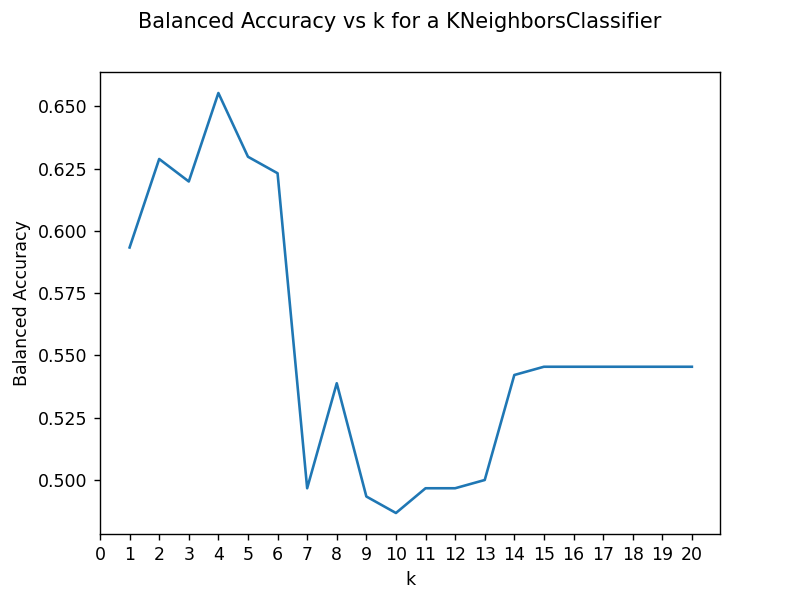

In [8]:
# Procedemos a dibujar balanced accuracy frente a los valores de k.
%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ks, bacc_scores)
fig.suptitle('Balanced Accuracy vs k for a KNeighborsClassifier')
ax.set_xlabel('k')
ax.set_ylabel('Balanced Accuracy')
ax.set_xticks(range(0, 21))
plt.show()

De la gráfica anterior, podemos ver como el mayor rendimento se obtiene con *k = 4*, alcanzando una balanced accuracy de 0.65 aproximadamente. El rendimiento decae a partir de este valor, y queda fijo en ~0.55 a partir de *k = 14*.